In [1]:
import qiskit as q
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from matplotlib import style
#style.use("dark_background") # I am using dark mode notebook, so I use this to see the chart.
# to use dark mode:
# edited '/usr/local/lib/python3.7/dist-packages/qiskit/visualization/bloch.py line 177 self.font_color = 'white'
# edited '/usr/local/lib/python3.7/dist-packages/qiskit/visualization/counts_visualization.py line 206     ax.set_facecolor('#000000')
%matplotlib inline


statevec_simulator = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend('qasm_simulator')

def do_job(circuit):
    job = q.execute(circuit, backend=statevec_simulator)
    result = job.result()
    statevec = result.get_statevector()
    
    num_qubits = circuit.num_qubits
    circuit.measure([i for i in range(num_qubits)], [i for i in range(num_qubits)])
    
    qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
    counts = qasm_job.get_counts()
    
    return statevec, counts


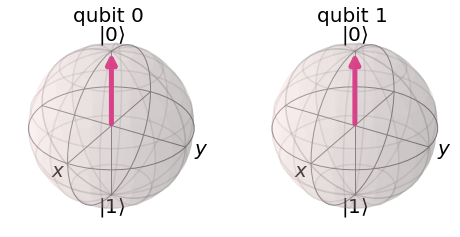

In [2]:
circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)

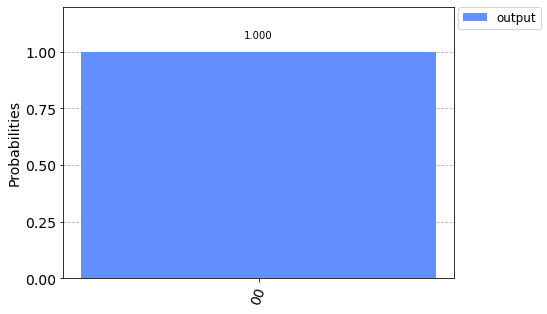

In [3]:
plot_histogram([counts],legend=['output'])

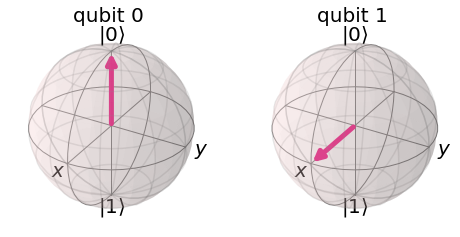

In [4]:
circuit = q.QuantumCircuit(2,2)
circuit.h(1)
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)

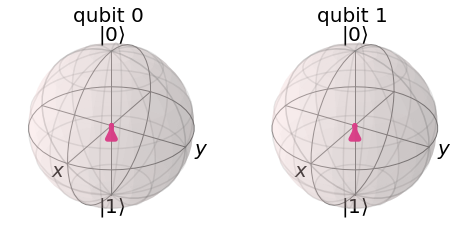

In [5]:
circuit = q.QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
statevec, counts = do_job(circuit)

plot_bloch_multivector(statevec)